In [1]:
%matplotlib inline
from pylab import *
import math
import numpy as np
from scipy import interpolate

import detectorgeometry_trap as geom_trap
reload(geom_trap)

import decay_properties as decay
reload(decay)

import trigger_properties as RF
reload(RF)


<module 'trigger_properties' from 'trigger_properties.pyc'>

In [2]:
phi_src = radians(180)
h = 35.5 #km
R = 6356. # km
ice =4
theta_view = radians(1) #degrees
N = 10000000 # number of samples 1000000
E_nu = 18 #log energy in eV of incident neutrino 
E_cut = 14
f_lo = 180
f_high = 1200
Gain_dB = 10
Nphased = 1
Epk_to_pk_threshold = 284e-6

## MAKING GRAPHS

### Make Graph of P_exit by elevation angle (at 10**18 eV)

In [ ]:

P_exit=[]

# start = 50 # minimum source declination in degrees
# end = 80 # maximum source declination in degrees
# steps=60 # divisions indeclination used to generate plot
# x1 = np.linspace(-(90-start),-(90-end),steps)

# for j in range(0,steps):
#     theta_src = radians(start+(end-start)*float(j)/steps)
#     geom_area = geom_trap.Area(theta_src, h,R,theta_view, N)
#     A_deg, phi_e, theta_e, view_angle, exit_angle, emg_angle, norm, e_dot, A0, N0 = geom_area.event_retention()
#     decay_cuts = decay.tau_event(theta_src, ice, E_cut, e_dot, phi_e, theta_e, \
#                              norm,E_nu, h, R, theta_view, exit_angle, emg_angle, view_angle, A_deg, A0, N0,0,0)
#     A_decay,ret_e_dot, ret_phi_e, ret_t_e, ret_tau_energy, ret_exit_obs, ret_exit_decay, ret_decay_obs, \
# ret_exit, ret_emg, ret_view, ret_decay_alt, ret_decay_angle, ret_fractions,ret_types, ret_p_exit, A0, N0 = decay_cuts.degree_eff_area()
#     if A_deg !=0:
#         prob_exit = float(A_decay)/float(A_deg)
#     else:
#         prob_exit =0
#     print prob_exit
#     P_exit.append(prob_exit)
    
    
start = 50 # minimum source declination in degrees
end = 90 # maximum source declination in degrees
steps=160 # divisions indeclination used to generate plot
x2 = np.linspace(-(90-start),-(90-end),steps)

for j in range(0,steps):
    theta_src = radians(start+(end-start)*float(j)/steps)
    geom_area = geom_trap.Area(theta_src, h,R,theta_view, N)
    A_deg, phi_e, theta_e, view_angle, exit_angle, emg_angle, norm, e_dot, A0, N0 = geom_area.event_retention()
    decay_cuts = decay.tau_event(theta_src, ice, E_cut, e_dot, phi_e, theta_e, \
                             norm,E_nu, h, R, theta_view, exit_angle, emg_angle, view_angle, A_deg, A0, N0,0,0)
    A_decay,ret_e_dot, ret_phi_e, ret_t_e, ret_tau_energy, ret_exit_obs, ret_exit_decay, ret_decay_obs, \
ret_exit, ret_emg, ret_view, ret_decay_alt, ret_decay_angle, ret_fractions,ret_types, ret_p_exit, A0, N0 = decay_cuts.degree_eff_area()
    if A_deg !=0:
        prob_exit = float(A_decay)/float(A_deg)
    else:
        prob_exit =0
    print prob_exit
    P_exit.append(prob_exit)



In [ ]:
fig = plt.figure(figsize=(7,7))
ax = plt.axes(yscale='log')
x_full = x2 # np.concatenate((x1,x2))

ax.plot(x_full, P_exit)

horizon = degrees(np.arcsin(R / (R+h)))-90
#plt.xlim(-40,0)  
plt.xlabel("Payload Elevation Angle of Source "+r'$\theta_{ele}$'+" (degrees)", fontsize=18)
plt.ylabel(r'$P_{exit}$', fontsize=18)
plt.title("ANITA "+r'$10^{18}$'+" eV Exit Probability", fontsize=20)

plt.text(-7.5,8*10**-4,'horizon',rotation=90,fontsize=12)
plt.text(-29,3*10**-4,'A1',rotation=90,fontsize=12)
plt.text(-36.5,3*10**-4,'A3',rotation=90,fontsize=12)
plt.text(-5,1.5*10**-7,'Ice: 4.0 km',fontsize=12)
horizon = degrees(np.arcsin(R / (R+h)))-90
A1 = -27.4
A3 = -35
plt.axvline(x=horizon,color='r')
plt.axvline(x=A1,color='k')
plt.axvline(x=A3,color='k')

ax.tick_params(axis = 'both', which = 'major', labelsize = 16)

# y_min =min(A_g)
# y_max = max(A_g)
# print y_min, y_max
# y_ticks = [10**x for x in range(int(round(math.log10(10**-10))),int(round(math.log10(y_max)))+1)]
# plt.yticks(y_ticks)
ax.grid(True,which='both')
#plt.semilogy()
plt.show()

### Make Graph of median decay distance, distance to ANITA by elevation angle (at 10**18 eV)
### Make Graph of median tau energy by elevation angle (at 10**18 eV)
### Make Graph fraction that exceed ANITA by elevation angle (at 10**18 eV)

In [31]:
N=1000000
E_nu = 19.5
decay_med=[]
dist_med = []
eng_med=[]
frac=[]

eng_hi=[]
eng_low=[]

start = 50 # minimum source declination in degrees
end = 90 # maximum source declination in degrees
steps=80 # divisions indeclination used to generate plot
x2 = np.linspace(-(90-start),-(90-end),steps)

for j in range(0,steps):
    theta_src = radians(start+(end-start)*float(j)/steps)
    geom_area = geom_trap.Area(theta_src, h,R,theta_view, N)
    A_deg, phi_e, theta_e, view_angle, exit_angle, emg_angle, norm, e_dot, A0, N0 = geom_area.event_retention()
    
    if len(exit_angle)!=0:
        
        decay_cuts = decay.tau_event(theta_src, ice, E_cut, e_dot, phi_e, theta_e, \
                             norm,E_nu, h, R, theta_view, exit_angle, emg_angle, view_angle, A_deg, A0, N0,1)
        A_decay,ret_e_dot, ret_phi_e, ret_t_e, ret_tau_energy, ret_exit_obs, ret_exit_decay, ret_decay_obs, \
ret_exit, ret_emg, ret_view, ret_decay_alt, ret_decay_angle, ret_fractions,ret_types, ret_p_exit, A0, N0 = decay_cuts.degree_eff_area()

        if len(ret_exit_decay)!=0:
            median_decay = np.median(ret_exit_decay)
            median_energy=np.median(ret_tau_energy)
            median_dist = np.median(ret_exit_obs)

            ratio = (10**median_energy) /(10**17)
            lamb = 4.9 * ratio
            fraction = 100*(1-exp(-median_dist/lamb))  
            decay_med.append(median_decay)
            dist_med.append(np.median(ret_exit_obs))
            eng_med.append(median_energy)
            frac.append(fraction)

            eng_hi.append(max(ret_tau_energy))
            eng_low.append(min(ret_tau_energy))
    else:
        decay_med.append(0)
        dist_med.append(0)
        eng_med.append(0)
        frac.append(0)
        eng_hi.append(0)
        eng_low.append(0)
    print degrees(theta_src), fraction



50.0 100.0
50.5 100.0
51.0 100.0
51.5 100.0
52.0 100.0
52.50000000000001 100.0
53.0 100.0
53.5 100.0
54.0 100.0
54.5 100.0
55.0 100.0
55.5 100.0
56.0 100.0
56.5 100.0
57.00000000000001 100.0
57.5 100.0
58.00000000000001 100.0
58.5 100.0
59.00000000000001 100.0
59.5 100.0
59.99999999999999 100.0
60.5 100.0
61.0 100.0
61.50000000000001 100.0
62.0 100.0
62.50000000000001 100.0
63.0 100.0
63.50000000000001 100.0
64.0 100.0
64.5 100.0
65.0 100.0
65.5 100.0
66.0 100.0
66.5 100.0
67.0 100.0
67.5 100.0
68.0 100.0
68.5 100.0
69.0 100.0
69.5 100.0
70.0 100.0
70.5 100.0
71.0 100.0
71.5 100.0
72.0 100.0
72.5 100.0
73.0 100.0
73.5 100.0
74.0 100.0
74.5 100.0
75.0 100.0
75.5 100.0
76.0 100.0
76.5 100.0
77.0 100.0
77.5 100.0
78.0 100.0
78.5 100.0
79.0 100.0
79.5 100.0
80.0 100.0
80.5 100.0
81.0 100.0
81.5 99.99999999999768
82.0 99.99998961968453
82.5 99.97513065918302
83.0 99.89862442048657
83.5 99.7890696742291
84.0 99.68183606494605
84.5 99.41664586218724
85.0 99.41664586218724
85.5 99.416645862187

In [10]:
print decay_cuts.TEScall

1e+19


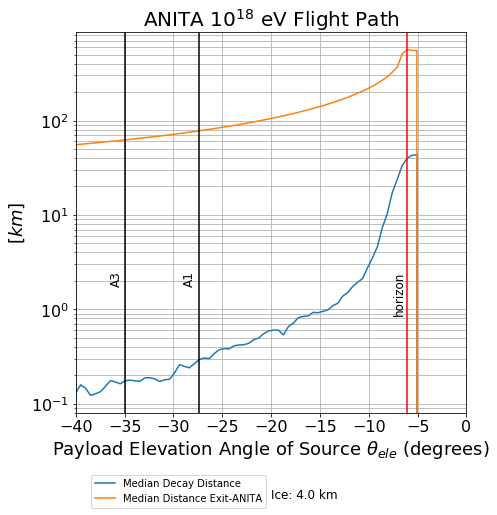

In [7]:
fig = plt.figure(figsize=(7,7))
ax = plt.axes()
#x_full = np.concatenate((x1,x2))
x_full = x2

ax.plot(x_full, decay_med)
ax.plot(x_full, dist_med)

horizon = degrees(np.arcsin(R / (R+h)))-90
plt.xlim(-40,0)  
plt.xlabel("Payload Elevation Angle of Source "+r'$\theta_{ele}$'+" (degrees)", fontsize=18)
plt.ylabel(r'$[km]$', fontsize=18)
plt.title("ANITA "+r'$10^{18}$'+" eV Flight Path", fontsize=20)

plt.text(-7.5,2,'horizon',rotation=90,fontsize=12)
plt.text(-29,2,'A1',rotation=90,fontsize=12)
plt.text(-36.5,2,'A3',rotation=90,fontsize=12)
plt.text(-20,0.01,'Ice: 4.0 km',fontsize=12)
horizon = degrees(np.arcsin(R / (R+h)))-90
A1 = -27.4
A3 = -35
plt.axvline(x=horizon,color='r')
plt.axvline(x=A1,color='k')
plt.axvline(x=A3,color='k')
plt.legend(["Median Decay Distance", "Median Distance Exit-ANITA"],bbox_to_anchor=[0.5,-0.15])

ax.tick_params(axis = 'both', which = 'major', labelsize = 16)

# y_min =min(A_g)
# y_max = max(A_g)
# print y_min, y_max
# y_ticks = [10**x for x in range(int(round(math.log10(10**-10))),int(round(math.log10(y_max)))+1)]
# plt.yticks(y_ticks)
ax.grid(True,which='both')
plt.semilogy()
plt.show()

### Make Graph of median tau energy by elevation angle (at 10**18 eV)


In [ ]:
for k in range(len(eng_low)):
    print eng_low[k], eng_med[k], eng_hi[k]

In [ ]:
fig = plt.figure(figsize=(7,7))
ax = plt.axes(yscale='log')
# start = 50 
# end = 90 # maximum source declination in degrees
# steps=40 # divisions indeclination used to generate plot
# x = np.linspace(-(90-start),-(90-end),steps)

eng_med =np.nan_to_num(eng_med)
eng_med_log = [10**eng_med[j] for j in range(len(eng_med))]
eng_low_log = [10**eng_low[j] for j in range(len(eng_med))]
eng_hi_log = [10**eng_hi[j] for j in range(len(eng_med))]
ax.plot(x2, eng_med_log)

# ax.plot(x, eng_low_)
# ax.plot(x, eng_hi)
plt.fill_between(x2, eng_low_log,eng_hi_log,color='lightgray')
horizon = degrees(np.arcsin(R / (R+h)))-90
plt.xlim(-40,0)  
plt.ylim(10**14,10**18)
plt.xlabel("Payload Elevation Angle of Source "+r'$\theta_{ele}$'+" (degrees)", fontsize=18)
plt.ylabel("Median "+r'$\tau}$'+" Energy "+r'$[eV]$', fontsize=18)
plt.title("ANITA "+r'$10^{18}$'+" eV "+r'$\tau}$'+" Energy", fontsize=20)

plt.text(-7.5,2*10**16,'horizon',rotation=90,fontsize=12)
plt.text(-29,2*10**15,'A1',rotation=90,fontsize=12)
plt.text(-36.5,2*10**15,'A3',rotation=90,fontsize=12)
#plt.text(-10,2*10**13,'Ice: 4.0 km',fontsize=12)
horizon = degrees(np.arcsin(R / (R+h)))-90
A1 = -27.4
A3 = -35
plt.axvline(x=horizon,color='r')
plt.axvline(x=A1,color='k')
plt.axvline(x=A3,color='k')
#plt.legend(["Median Decay Distance", "Median Distance Exit-ANITA"])

ax.tick_params(axis = 'both', which = 'major', labelsize = 16)

# y_min =min(eng_med_log)
# y_max = max(eng_med_log)
# print y_min, y_max
# y_ticks = [10**x for x in range(int(round(math.log10(10**0))),int(round(math.log10(y_max)))+1)]
# plt.yticks(y_ticks)
ax.grid(True,which='both')
#plt.semilogy()
plt.show()

### Make Graph fraction that exceed ANITA by elevation angle (at 10**18 eV)

In [ ]:
frac = np.nan_to_num(frac)
print frac

(-40, 0)

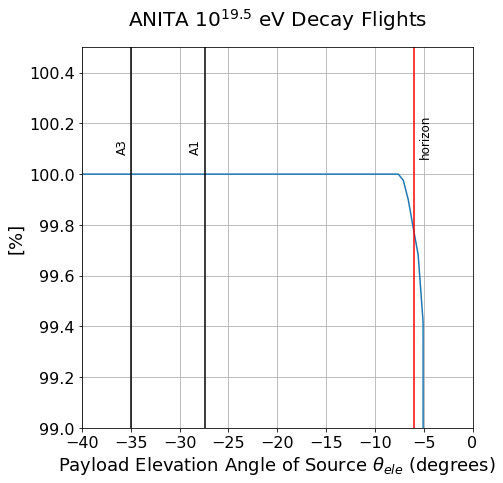

In [32]:
fig = plt.figure(figsize=(7,7))
ax = plt.axes()

# frac_plot0 = [100*(1-frac[k]) for k in range(len(frac))]
# frac_plot1 = [100*(1-frac[k]) for k in range(len(frac))]
# frac_plot1[109:]= ['nan' for x in range(len(frac_plot1[109:]))]
ax.plot(x2, frac )

horizon = degrees(np.arcsin(R / (R+h)))-90
#plt.xlim(-40,0)
plt.ylim(99,100.5)
plt.xlabel("Payload Elevation Angle of Source "+r'$\theta_{ele}$'+" (degrees)", fontsize=18)
plt.ylabel('[%]', fontsize=18)
plt.title("ANITA "+r'$10^{19.5}$'+" eV Decay Flights", fontsize=20, y=1.04)

plt.text(-5.5,100.2,'horizon',rotation=90,fontsize=12)
plt.text(-29,100.1,'A1',rotation=90,fontsize=12)
plt.text(-36.5,100.1,'A3',rotation=90,fontsize=12)
# plt.text(-10,10**-18,'Ice: 4.0 km',fontsize=12)
horizon = degrees(np.arcsin(R / (R+h)))-90
A1 = -27.4
A3 = -35
plt.axvline(x=horizon,color='r')
plt.axvline(x=A1,color='k')
plt.axvline(x=A3,color='k')
#plt.legend(["Median Decay Distance", "Median Distance Exit-ANITA"])

ax.tick_params(axis = 'both', labelsize = 16)

# y_ticks = [10**x for x in range(0,3)]
# print y_ticks
# plt.yticks(y_ticks)
ax.grid(True,which='both')
plt.xlim(-40,0)
#plt.semilogy()

### Trigger Graphs

In [ ]:
theta_src = np.radians(83.6)
E_nu = 18
N = 50000000
Epk_to_pk_threshold3 = 248e-6
Epk_to_pk_threshold1 = 446e-6
view_angle = radians(1)

geom_area = geom_trap.Area(theta_src, h,R,view_angle, N)
A_deg, phi_e, theta_e, view_angle, exit_angle, emg_angle, norm, e_dot, A0, N0 = geom_area.event_retention()

decay_cuts = decay.tau_event(theta_src, ice, E_cut, e_dot, phi_e, theta_e, \
                         norm,E_nu, h, R, theta_view, exit_angle, emg_angle, view_angle, A_deg, A0, N0,1)
A_decay,ret_e_dot, ret_phi_e, ret_t_e, ret_tau_energy, ret_exit_obs, ret_exit_decay, ret_decay_obs, \
ret_exit, ret_emg, ret_view, ret_decay_alt, ret_decay_angle, ret_shower_eng,ret_types, ret_p_exit, A0, N0 = decay_cuts.degree_eff_area()

trigger_result = RF.event_detection(A_decay, f_lo, f_high, Gain_dB, Nphased, \
                                    ret_exit,ret_emg,ret_view, ret_decay_angle, ret_decay_alt, \
                                    theta_view, ret_exit_obs,ret_exit_decay, ret_decay_obs, ret_p_exit, ret_e_dot,\
                                    ret_shower_eng, R, ice, h, ret_t_e, ret_phi_e,theta_src, Epk_to_pk_threshold3, A0,N0)


A = trigger_result.RF_eff_area()

decay_alt, Peak_V, delta_decay_view_angle, decay_view_angle, trigger, threshhold = trigger_result.RF_voltage()
print A*(1000)**2

In [ ]:
trigger2 = (Peak_V >threshhold)
ret_decay_alt=[]
ret_decay_view_angle=[]
ret_delta_decay_view_angle =[]
ret_Peak_V =[]

for k in range(len(trigger2)):
    if trigger2[k]==True:
        ret_decay_alt.append(decay_alt[k])
        ret_decay_view_angle.append(decay_view_angle[k])
        ret_delta_decay_view_angle.append(delta_decay_view_angle[k])
        ret_Peak_V.append(Peak_V[k])
                           

In [ ]:
print len(decay_view_angle), len(ret_decay_view_angle)

### Make Histogram of detected decay view angles (for A1, A3, Peak)

In [ ]:
fig, ax = plt.subplots(num=1,figsize=(5,5))
        
plt.xlabel('Decay View Angle (deg)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xlim(0,17.5)
plt.ylim(0.5,10**5)
min_bin = int(round(min(decay_view_angle)))
max_bin = int(round(max(decay_view_angle)+1) + 1)
n, bins, patches = plt.hist(x=decay_view_angle, bins=arange(min_bin,max_bin,0.25), color='#0504aa',
                   rwidth=0.85)
n, bins, patches = plt.hist(x=ret_decay_view_angle, bins=arange(min_bin,max_bin,0.25), color='red',
                   rwidth=0.85)

plt.title("Near Horizon Decay View Angles", fontsize=16)
#ax.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{:.3g}'))
#plt.figtext(.5,-0.1,"Voltage Cutoff "+'{:.3g}'.format(cutoff), fontsize=12, ha='center')
#plt.figtext(.5,-0.1,"Voltage Cutoff "+str(round(cutoff,6)), fontsize=12, ha='center')
#plt.text(0.02, 0.02, "View Angle Cut: "+str(threshhold), fontsize=14, transform=plt.gcf().transFigure)
plt.semilogy()
#plt.semilogx()

print max(ret_decay_view_angle)

### Make Histogram of detected decay altitudes (for A1, A3, Peak)

In [ ]:
fig, ax = plt.subplots(num=1,figsize=(5,5))
        
plt.xlabel('Decay Altitude (km)', fontsize=14)
plt.ylabel('Count', fontsize=14)
min_bin = int(round(min(decay_alt)))
max_bin = int(round(max(decay_alt)+1) + 1)
n, bins, patches = plt.hist(x=decay_alt, bins=arange(min_bin,max_bin,1), color='#0504aa',
                   rwidth=0.85)
n, bins, patches = plt.hist(x=ret_decay_alt, bins=arange(min_bin,max_bin,1), color='red',
                   rwidth=0.85)
#plt.axvline(x=threshhold)
plt.title("Near Horizon Decay Altitudes", fontsize=16)
#ax.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{:.3g}'))
#plt.figtext(.5,-0.1,"Voltage Cutoff "+'{:.3g}'.format(cutoff), fontsize=12, ha='center')
#plt.figtext(.5,-0.1,"Voltage Cutoff "+str(round(cutoff,6)), fontsize=12, ha='center')
#plt.text(0.02, 0.02, "View Angle Cut: "+str(threshhold), fontsize=14, transform=plt.gcf().transFigure)
plt.semilogy()

print max(ret_decay_alt)

### Make Histogram of Decay Voltages

In [ ]:
fig, ax = plt.subplots(num=1,figsize=(5,5))
        
plt.xlabel('Voltage (mV)', fontsize=14)
plt.ylabel('Count', fontsize=14)
Peak_V_mv = [1000*Peak_V[k] for k in range(len(Peak_V))]
ret_Peak_V_mv = [1000*ret_Peak_V[k] for k in range(len(ret_Peak_V))]
min_bin = 1000*min(Peak_V)
max_bin = 1000*max(Peak_V)


n, bins, patches = plt.hist(x=Peak_V_mv, bins=np.arange(min_bin,max_bin,0.0005), color='#0504aa',rwidth=0.85)
n, bins, patches = plt.hist(x=ret_Peak_V_mv, bins=np.arange(min_bin,max_bin,0.0005), color='red',
                   rwidth=0.85)
plt.axvline(x=threshhold*1000,color="black")
plt.title("Near Horizon RF Voltages", fontsize=16)
#ax.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{:.3g}'))
#plt.figtext(.5,-0.1,"Voltage Cutoff "+'{:.3g}'.format(cutoff), fontsize=12, ha='center')
#plt.figtext(.5,-0.1,"Voltage Cutoff "+str(round(cutoff,6)), fontsize=12, ha='center')
#plt.text(0.02, 0.02, "View Angle Cut: "+str(threshhold), fontsize=14, transform=plt.gcf().transFigure)
plt.semilogy()


### Scatter View Angle Voltage

In [ ]:
fig, ax = plt.subplots(num=1,figsize=(5,5))
        
plt.ylabel('Voltage (mV)', fontsize=14)
plt.xlabel('Decay View Angle (deg)', fontsize=14)
plt.scatter(decay_view_angle, [1000*Peak_V[k] for k in range(len(Peak_V))], color='#0504aa', s=10)
plt.scatter(ret_decay_view_angle, [1000*ret_Peak_V[k] for k in range(len(ret_Peak_V))],
            c="red", s=10)

plt.axhline(y=threshhold*1000,color="black")
plt.title("A1 RF Signal Parameters", fontsize=16)

### INVESTING LUT

In [ ]:
start = 80 # minimum source declination in degrees
end = 85 # maximum source declination in degrees
steps=40 # divisions indeclination used to generate plot
x2 = np.linspace(-(90-start),-(90-end),steps)

import Tau_Exit_Simulator_2 as TauExitSimulator
reload(TauExitSimulator)

for j in range(0,1):
    theta_src = radians(start+(end-start)*float(j)/steps)
    geom_area = geom_trap.Area(theta_src, h,R,theta_view, N)
    earth_t = geom_area.thetaE_nadir(theta_src)
    earth_t_min, earth_t_max, phi_E_min, phi_E_max = geom_area.earth_patch(theta_src,phi_src, theta_view)
    r_x, r_y, r_z = geom_area.coords(theta_src,phi_src + np.pi) 
    t_e,phi_e = geom_area.earth_locs(earth_t_min, earth_t_max, phi_E_min, phi_E_max)
    e_x,e_y,e_z = geom_area.coords(t_e,phi_e)
    view_angle, exit_angle,emg_angle, flight_path = geom_area.view_angle_dist_det(e_x,e_y,e_z,r_x, r_y,r_z)
    mean_exit = np.mean(exit_angle)
    
    
    
    print np.round(degrees(theta_src),3), round(mean_exit,3) #, TES.data_array[]
    

In [ ]:
import Tau_Exit_Simulator_2 as TauExitSimulator
reload(TauExitSimulator)

TES=TauExitSimulator.Tau_Exit_Simulator('./high_statistics/4.0km_ice_midCS_stdEL/LUT_1e+18_eV.npz')

for i in range(len(TES.data_array)-1):
    int_val = (TES.th_exit[i]+TES.th_exit[i+1])/2
    if len(TES.data_array[i])!=0:
        print len(TES.data_array[i])
        print TES.th_exit[i], min(energy_arr), TES.sample_energies_th_exit(int_val)
    else:
        print i, TES.th_exit[i], "N/A", TES.sample_energies_th_exit(int_val)
    print "  "

In [ ]:
print len(TES.data_array[28])

In [ ]:
6.2 * 10**-5 * 24 * 18 * 3600 *100**2

## Plotting the difference in trigger probability for tau enery or shower energy

In [ ]:
A_rf_t = []
A_rf_s = []

N=1000000

start = 50 # minimum source declination in degrees
end = 90 # maximum source declination in degrees
steps=80 # divisions indeclination used to generate plot
x2 = np.linspace(-(90-start),-(90-end),steps)

for j in range(0,steps):
    theta_src = radians(start+(end-start)*float(j)/steps)  
    geom_area = geom_trap.Area(theta_src, h,R,theta_view, N)
    A_deg, phi_e, theta_e, view_angle, exit_angle, emg_angle, norm, e_dot, A0, N0 = geom_area.event_retention()
 
    decay_prop = decay.tau_event(theta_src, ice, E_cut, e_dot, phi_e, theta_e, \
                             norm,E_nu, h, R, theta_view, exit_angle, emg_angle, view_angle, A_deg, A0, N0,1)

    A_decay,ret_e_dot, ret_phi_e, ret_t_e, ret_tau_energy, ret_exit_obs, ret_exit_decay, ret_decay_obs, \
    ret_exit, ret_emg, ret_view, ret_decay_alt, ret_decay_angle, ret_shower_eng,ret_types, ret_p_exit, A0, N0 = decay_prop.degree_eff_area()
    
    A_trigger_t =0
    A_trigger_s =0
    if len(ret_e_dot) != 0:
        trigger_result_t = RF.event_detection(A_decay, f_lo, f_high, Gain_dB, Nphased, \
                                        ret_exit,ret_emg,ret_view, ret_decay_angle, ret_decay_alt, \
                                        theta_view, ret_exit_obs,ret_exit_decay, ret_decay_obs, ret_p_exit, ret_e_dot,\
                                        ret_tau_energy, R, ice, h, ret_t_e, ret_phi_e,theta_src, Epk_to_pk_threshold, A0,N0)
        A_trigger_t = trigger_result_t.RF_eff_area()
        
        trigger_result_s = RF.event_detection(A_decay, f_lo, f_high, Gain_dB, Nphased, \
                                        ret_exit,ret_emg,ret_view, ret_decay_angle, ret_decay_alt, \
                                        theta_view, ret_exit_obs,ret_exit_decay, ret_decay_obs, ret_p_exit, ret_e_dot,\
                                        ret_shower_eng, R, ice, h, ret_t_e, ret_phi_e,theta_src, Epk_to_pk_threshold, A0,N0)
        A_trigger_s = trigger_result_s.RF_eff_area()

    A_rf_t.append(A_trigger_t)
    A_rf_s.append(A_trigger_s)
    print round(degrees(theta_src),4)

In [ ]:
arrays = [ret_exit,ret_emg,ret_view, ret_decay_angle, ret_decay_alt, \
                                         ret_exit_obs,ret_exit_decay, ret_decay_obs, ret_p_exit, ret_e_dot,\
                                        ret_shower_eng, ret_tau_energy,  ret_t_e, ret_phi_e]
for i in range(len(arrays)):
    print i, len(arrays[i])

In [ ]:
# Creating a plot for the full range of possible source declinations 
fig = plt.figure(figsize=(7,7))
ax = plt.axes()
x_full = x2 #np.concatenate((x1,x2))

ax.plot(x_full, A_rf_t)
ax.plot(x_full, A_rf_s)
    
horizon = degrees(np.arcsin(R / (R+h)))-90
plt.text(-7.5,10**-7,'horizon',rotation=90,fontsize=12)
plt.text(-29,10**-4,'A1',rotation=90,fontsize=12)
plt.text(-36.5,10**-4,'A3',rotation=90,fontsize=12)
horizon = degrees(np.arcsin(R / (R+h)))-90
A1 = -27.4
A3 = -35
plt.axvline(x=horizon,color='r')
plt.axvline(x=A1,color='k')
plt.axvline(x=A3,color='k')
legend = ax.legend(["Tau Energy", "Shower Energy"], fontsize=14)
plt.xlabel("Payload Elevation Angle of Source "+r'$\theta_{ele}$'+" (degrees)", fontsize=18)
plt.ylabel(r'$\langle A \rangle$'+" "+r'$[km^2]$', fontsize=18)
plt.title("Geometric Effective Area", fontsize=20)
plt.setp(legend.get_title(),fontsize='x-large')
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
plt.grid(True,which='both')
plt.semilogy()

In [ ]:
## Plotting the two thresholds

In [ ]:
#Graph for different cutoffs
Epk_to_pk_threshold3 = 248e-6
Epk_to_pk_threshold1 = 446e-6

A_rf_1 = []
A_rf_3 = []

N=10000000

start = 50 # minimum source declination in degrees
end = 90 # maximum source declination in degrees
steps=80 # divisions indeclination used to generate plot
x2 = np.linspace(-(90-start),-(90-end),steps)

for j in range(0,steps):
    theta_src = radians(start+(end-start)*float(j)/steps)  
    print start+(end-start)*float(j)/steps
    geom_area = geom_trap.Area(theta_src, h,R,theta_view, N)
    A_deg, phi_e, theta_e, view_angle, exit_angle, emg_angle, norm, e_dot, A0, N0 = geom_area.event_retention()
 
    decay_prop = decay.tau_event(theta_src, ice, E_cut, e_dot, phi_e, theta_e, \
                             norm,E_nu, h, R, theta_view, exit_angle, emg_angle, view_angle, A_deg, A0, N0,1)

    A_decay,ret_e_dot, ret_phi_e, ret_t_e, ret_tau_energy, ret_exit_obs, ret_exit_decay, ret_decay_obs, \
    ret_exit, ret_emg, ret_view, ret_decay_alt, ret_decay_angle, ret_shower_eng,ret_types, ret_p_exit, A0, N0 = decay_prop.degree_eff_area()
    A_trigger1 =0
    A_trigger3 =0
    if len(ret_e_dot) != 0:
        trigger_result1 = RF.event_detection(A_decay, f_lo, f_high, Gain_dB, Nphased, \
                                        ret_exit,ret_emg,ret_view, ret_decay_angle, ret_decay_alt, \
                                        theta_view, ret_exit_obs,ret_exit_decay, ret_decay_obs, ret_p_exit, ret_e_dot,\
                                        ret_shower_eng, R, ice, h, ret_t_e, ret_phi_e,theta_src, Epk_to_pk_threshold1, A0,N0)
        A_trigger1 = trigger_result1.RF_eff_area()
        
        trigger_result3 = RF.event_detection(A_decay, f_lo, f_high, Gain_dB, Nphased, \
                                        ret_exit,ret_emg,ret_view, ret_decay_angle, ret_decay_alt, \
                                        theta_view, ret_exit_obs,ret_exit_decay, ret_decay_obs, ret_p_exit, ret_e_dot,\
                                        ret_shower_eng, R, ice, h, ret_t_e, ret_phi_e,theta_src, Epk_to_pk_threshold3, A0,N0)
        A_trigger3 = trigger_result3.RF_eff_area()

    A_rf_1.append(A_trigger1)
    A_rf_3.append(A_trigger3)
    print round(degrees(theta_src),4)

In [ ]:
# Creating a plot for the full range of possible source declinations 
fig = plt.figure(figsize=(7,7))
ax = plt.axes()
x_full = x2 #np.concatenate((x1,x2))

ax.plot(x_full, A_rf_1)
ax.plot(x_full, A_rf_3)
    
horizon = degrees(np.arcsin(R / (R+h)))-90
plt.text(-5.5,10**-4,'horizon',rotation=90,fontsize=12)
plt.text(-29,10**-4,'A1',rotation=90,fontsize=12)
plt.text(-36.5,10**-4,'A3',rotation=90,fontsize=12)
horizon = degrees(np.arcsin(R / (R+h)))-90
A1 = -27.4
A3 = -35
plt.axvline(x=horizon,color='r')
plt.axvline(x=A1,color='k')
plt.axvline(x=A3,color='k')
legend = ax.legend(["ANITA 1","ANITA 3"], fontsize=14,bbox_to_anchor=(0.8, -0.15))
plt.xlabel("Payload Elevation Angle of Source "+r'$\theta_{ele}$'+" (degrees)", fontsize=18)
plt.ylabel(r'$\langle A \rangle$'+" "+r'$[km^2]$', fontsize=18)
plt.title("Geometric Effective Area", fontsize=20)
plt.setp(legend.get_title(),fontsize='x-large')
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
plt.grid(True,which='both')
plt.semilogy()